### 전처리(Preprocessing)
* 원본 raw데이터의 품질이 좋지 않아서 가공하여 데이터의 품질을 향상시키는 과정
#### (1) 표준화(Standardization) : 데이터가 평균으로부터 얼마나 떨어져 있는지를 나타낸 값으로, 특정 범위를 벗어난 데이터를 이상치(outlier)로 간주하여 제거 한다, StandardScaler 사용, Z = (X-mean( ))/std( )

#### (2) 정규화(Normalization) : 데이터의 범위를 일치시키거나 분포를 유사하게 만들어 주는 기능, 데이터의 범위를 0~1 사이의 값으로 변환, MinMaxScaler, Z = (X-min( ))/(max( )-min( ))



### 데이터 분석 절차
#### 데이터를 표준화를 통해 outlier를 제거하고, 그 다음에 데이터 정규화를 하여 상대적 크기의 영향력을 줄인 다음 분석을 시작한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 표준화(Standardization)

In [9]:
# (1) numpy를 이용한 표준화
# Z = (X-mean())/std()

data = np.random.randint(1000,size=(3,4)) # 0~999가지의 정수, (3,4) 2차원 배열
print('raw_data:\n',data)

data_stand_np = (data-np.mean(data,axis=0))/np.std(data,axis=0)
print('numpy standardized data:\n', data_stand_np)
# np.mean(data,axis=0)  # 행방향으로, 열별로


raw_data:
 [[206 465 213 958]
 [ 13 681 929 516]
 [727 350 540 551]]
numpy standardized data:
 [[-0.36255026 -0.245364   -1.18791016  1.41062211]
 [-1.00253988  1.32885254  1.25852418 -0.79254034]
 [ 1.36509014 -1.08348855 -0.07061403 -0.61808177]]


In [3]:
# (2) scipy.stats 를 이용한 표준화 : zscore()
import scipy.stats as ss

data_stand_ss = ss.zscore(data)
print('scipy standardized data:\n',data_stand_ss)

scipy standardized data:
 [[-0.7005128   0.75049077 -0.98905246  1.40461845]
 [-0.71368033 -1.41330738  1.36992981 -0.55988288]
 [ 1.41419313  0.66281661 -0.38087735 -0.84473557]]


In [10]:
# (3) sklearn.preprocessing 를  이용한 표준화
# StandardScaler().fit_transform()  (fit() --> transform())

from sklearn.preprocessing import StandardScaler

data_stand_skl = StandardScaler().fit_transform(data)
print('sklearn standardized data:\n',data_stand_skl)

# 동일한 구현
sc = StandardScaler()   # 클래스의 인스턴스를 생성
sc.fit(data)
data_stand_skl = sc.transform(data)
print('sklearn standardized data:\n',data_stand_skl)

sklearn standardized data:
 [[-0.36255026 -0.245364   -1.18791016  1.41062211]
 [-1.00253988  1.32885254  1.25852418 -0.79254034]
 [ 1.36509014 -1.08348855 -0.07061403 -0.61808177]]
sklearn standardized data:
 [[-0.36255026 -0.245364   -1.18791016  1.41062211]
 [-1.00253988  1.32885254  1.25852418 -0.79254034]
 [ 1.36509014 -1.08348855 -0.07061403 -0.61808177]]


### 정규화

In [11]:
# (1) numpy를 이용한 정규화 : 0 ~ 1 범위
# Z = (X-min())/(max()-min())

data_minmax_np = (data - np.min(data,axis=0))/(np.max(data,axis=0) 
                                               - np.min(data,axis=0))
print('numpy minmax data:\n',data_minmax_np)

numpy minmax data:
 [[0.27030812 0.34743202 0.         1.        ]
 [0.         1.         1.         0.        ]
 [1.         0.         0.45670391 0.07918552]]


In [12]:
# (2) sklearn.preprocessing 를  이용한 정규화
# MinMaxScaler 클래스 : fit_transform() (fit() -> transform())
from sklearn.preprocessing import MinMaxScaler

data_minmax_skl = MinMaxScaler().fit_transform(data)
print('sklearn minmax data:\n',data_minmax_skl)

# 동일한 구현
sc = MinMaxScaler()   # 클래스의 인스턴스를 생성
sc.fit(data)
data_minmax_skl = sc.transform(data)
print('sklearn minmax data:\n',data_minmax_skl)

sklearn minmax data:
 [[0.27030812 0.34743202 0.         1.        ]
 [0.         1.         1.         0.        ]
 [1.         0.         0.45670391 0.07918552]]
sklearn minmax data:
 [[0.27030812 0.34743202 0.         1.        ]
 [0.         1.         1.         0.        ]
 [1.         0.         0.45670391 0.07918552]]


In [13]:
data

array([[206, 465, 213, 958],
       [ 13, 681, 929, 516],
       [727, 350, 540, 551]])

### 이상치를 제거하여 표준화 하기

raw data:
 [ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021  0.43302619  1.20303737
 -0.96506567  1.02827408  0.22863013  0.44513761 -1.13660221  0.13513688
  1.484537   -1.07980489 -1.97772828 -1.7433723   0.26607016  2.38496733
  1.12369125  1.67262221  0.09914922  1.39799638 -0.27124799  0.61320418
 -0.26731719 -0.54930901  0.1327083  -0.47614201  1.30847308  0.19501328
  0.40020999 -0.33763234  1.25647226 -0.7319695   0.66023155 -0.35087189
 -0.93943336 -0.48933722 -0.80459114 -0.21269764 -0.33914025  0.31216994
  0.56515267 -0.14742026 -0.02590534  0.2890942  -0.53987907  0.70816002
  0.84222474  0.2035808   2.39470366  0.91745894 -0.11227247 -0.36218045
 -0.23218226 -0.5017289   1.12878515 -0.69781003 -0.08112218 -0.52929608
  1.04618286 -1.41855603 -0.36249918 -0.12190569  0.31935642  0.4609029
 -0.21578989  0.98907246  0.31475378  2.46765106 -1.50832149  0.62060066
 -1.04513254 -0.79800882  1.98508459  1.7

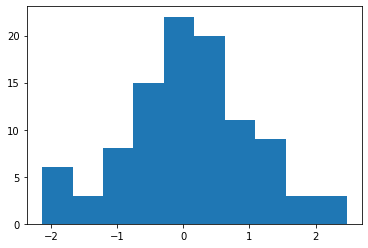

In [15]:
np.random.seed(10)
data = np.random.randn(100) # 정규 분포를 이루는 random, 100개
print('raw data:\n',data)
print(np.min(data),np.max(data))
plt.hist(data)     # 정규성이 있다
plt.show()

insert outlier data:
 [ 1.33158650e+00  7.15278974e-01 -1.54540029e+00 -8.38384993e-03
  6.21335974e-01 -7.20085561e-01  2.65511586e-01  1.08548526e-01
  4.29143093e-03 -1.74600211e-01  4.33026190e-01  1.20303737e+00
 -9.65065671e-01  1.02827408e+00  2.28630130e-01  4.45137613e-01
 -1.13660221e+00  1.35136878e-01  1.48453700e+00 -1.07980489e+00
 -1.97772828e+00 -1.74337230e+00  2.66070164e-01  2.38496733e+00
  1.12369125e+00  1.67262221e+00  9.91492158e-02  1.39799638e+00
 -2.71247988e-01  6.13204185e-01 -2.67317189e-01 -5.49309014e-01
  1.32708296e-01 -4.76142015e-01  1.30847308e+00  1.95013279e-01
  4.00209988e-01 -3.37632337e-01  1.25647226e+00 -7.31969502e-01
  6.60231551e-01 -3.50871891e-01 -9.39433360e-01 -4.89337217e-01
 -8.04591142e-01 -2.12697639e-01 -3.39140246e-01  3.12169936e-01
  5.65152670e-01 -1.47420258e-01 -2.59053368e-02  2.89094204e-01
 -5.39879071e-01  7.08160020e-01  8.42224738e-01  2.03580797e-01
  2.39470366e+00  9.17458938e-01 -1.12272471e-01 -3.62180447e-01
 -2

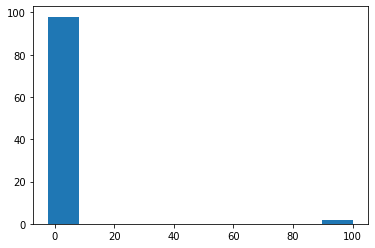

In [16]:
data[98:] = 100
print('insert outlier data:\n',data)
print(np.min(data),np.max(data))
plt.hist(data)   # 정규성이 없다
plt.show()

standardized data:
 [[-0.05414927]
 [-0.09811235]
 [-0.25937343]
 [-0.14973341]
 [-0.10481359]
 [-0.20050124]
 [-0.13019562]
 [-0.14139227]
 [-0.14882924]
 [-0.16159012]
 [-0.11824629]
 [-0.06331907]
 [-0.21797641]
 [-0.07578546]
 [-0.13282648]
 [-0.11738235]
 [-0.23021263]
 [-0.13949564]
 [-0.04323885]
 [-0.2261611 ]
 [-0.29021269]
 [-0.27349537]
 [-0.13015577]
 [ 0.02099156]
 [-0.06897907]
 [-0.02982217]
 [-0.14206275]
 [-0.04941206]
 [-0.1684843 ]
 [-0.10539365]
 [-0.1682039 ]
 [-0.18831923]
 [-0.13966888]
 [-0.18310001]
 [-0.05579802]
 [-0.13522447]
 [-0.12058717]
 [-0.17321969]
 [-0.0595074 ]
 [-0.20134896]
 [-0.10203905]
 [-0.17416411]
 [-0.21614798]
 [-0.18404126]
 [-0.20652928]
 [-0.16430773]
 [-0.17332726]
 [-0.12686734]
 [-0.10882131]
 [-0.15965129]
 [-0.15098327]
 [-0.1285134 ]
 [-0.18764656]
 [-0.09862017]
 [-0.08905693]
 [-0.13461333]
 [ 0.02168608]
 [-0.08369024]
 [-0.15714409]
 [-0.17497079]
 [-0.16569762]
 [-0.1849252 ]
 [-0.06861571]
 [-0.19891226]
 [-0.15492205]
 [-0.

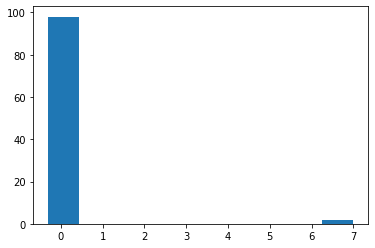

In [17]:
# sklearn 사용 표준화
data.shape     # (100,)   # 1차원
data = data.reshape(-1,1) # 반드시 2차원으로 변경하여 사용, (100,1)
data_stand_skl = StandardScaler().fit_transform(data)
print('standardized data:\n',data_stand_skl)
plt.hist(data_stand_skl)
plt.show()

zoomin data:
 [-0.05414927 -0.09811235 -0.25937343 -0.14973341 -0.10481359 -0.20050124
 -0.13019562 -0.14139227 -0.14882924 -0.16159012 -0.11824629 -0.06331907
 -0.21797641 -0.07578546 -0.13282648 -0.11738235 -0.23021263 -0.13949564
 -0.04323885 -0.2261611  -0.29021269 -0.27349537 -0.13015577  0.02099156
 -0.06897907 -0.02982217 -0.14206275 -0.04941206 -0.1684843  -0.10539365
 -0.1682039  -0.18831923 -0.13966888 -0.18310001 -0.05579802 -0.13522447
 -0.12058717 -0.17321969 -0.0595074  -0.20134896 -0.10203905 -0.17416411
 -0.21614798 -0.18404126 -0.20652928 -0.16430773 -0.17332726 -0.12686734
 -0.10882131 -0.15965129 -0.15098327 -0.1285134  -0.18764656 -0.09862017
 -0.08905693 -0.13461333  0.02168608 -0.08369024 -0.15714409 -0.17497079
 -0.16569762 -0.1849252  -0.06861571 -0.19891226 -0.15492205 -0.18689165
 -0.07450798 -0.25032525 -0.17499352 -0.15783126 -0.1263547  -0.11625776
 -0.1645283  -0.07858183 -0.12668302  0.02688964 -0.25672849 -0.10486604
 -0.22368782 -0.20605974 -0.00753328 

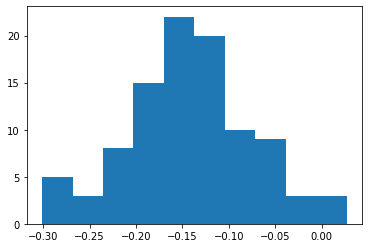

In [18]:
# 이상치의 경계값을 임의로 5로 결정 : 고정된 답이 아님, IQR을 사용하면 정확한 계산가능
data_stand_skl_zoomin = data_stand_skl[data_stand_skl < 5]
print('zoomin data:\n',data_stand_skl_zoomin)
plt.hist(data_stand_skl_zoomin) # 정규성이 있다
plt.show()

In [19]:
from sklearn.base import TransformerMixin

class A(TransformerMixin):
    def fit(self,X):
        print('fit:',X)
        return self
    
    def transform(self,X):
        print('transform:',X)
        return X

inst = A()  # 클래스의 인스턴스 생성
# inst.fit('x_data')
# inst.transform('y_data')
inst.fit_transform('my_data')

fit: my_data
transform: my_data


'my_data'

### 레이블 인코딩(Label Encoding)

In [20]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','믹서','선풍기','믹서']

encoder = LabelEncoder()  # 클래스의 인스턴스 객체를 생성
encoder.fit(items)
labels = encoder.transform(items)
print('encoding 변환 값:',labels)


encoding 변환 값: [0 1 4 5 3 2 3 2]


In [21]:
print('encoding 클래스:',encoder.classes_)

encoding 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [22]:
print('decoding 원본 값:',encoder.inverse_transform([0,1,3,5,4,2,4,5]))

decoding ['TV' '냉장고' '선풍기' '컴퓨터' '전자레인지' '믹서' '전자레인지' '컴퓨터']


### Boston 주택 가격 예측 전처리

In [35]:
df = pd.read_csv('boston_train.csv')
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6
...,...,...,...,...,...,...,...,...,...,...
395,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,21.2
396,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,23.3
397,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,307,21.0,13.2
398,7.36711,0.0,18.10,0.679,6.193,78.1,1.9356,666,20.2,11.0


In [36]:
# 전처리 : 표준화
df_stand = StandardScaler().fit_transform(df)  # ndarray, 2차원
df = pd.DataFrame(df_stand, columns=df.columns)
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,-0.171556,-0.483311,1.171334,0.424507,0.060120,0.947403,-0.786047,-0.050476,-1.758773,0.122848
1,1.010703,-0.483311,0.959979,1.185594,-0.535048,0.898253,-0.937184,1.483792,0.791013,-1.038165
2,-0.403848,-0.483311,-0.638040,-0.933342,0.681464,-2.324588,0.935411,-1.042209,-0.275261,0.415716
3,-0.400500,-0.483311,-0.081090,-1.236047,-0.433098,-1.812023,0.729268,-0.622181,0.327416,-0.096803
4,-0.413443,2.924037,-1.407774,-1.313885,1.375827,-1.081793,1.690430,-0.482172,-2.732328,1.252482
...,...,...,...,...,...,...,...,...,...,...
395,-0.391909,-0.483311,-0.241035,0.251533,-0.353192,-0.133899,-0.639094,-0.120481,0.327416,-0.149101
396,-0.412596,-0.483311,0.358758,-0.051172,-0.533671,-0.460396,-0.304872,-0.791359,-0.970657,0.070550
397,-0.269094,-0.483311,-0.462387,-0.154957,-0.448253,0.452391,0.112502,-0.610513,1.161891,-0.985867
398,0.370079,-0.483311,0.959979,1.064512,-0.113471,0.315473,-0.864206,1.483792,0.791013,-1.215978


In [37]:
# 전처리 : 정규화 , 0 ~ 1 범위
df_minmax = MinMaxScaler().fit_transform(df)  # ndarray, 2차원
df = pd.DataFrame(df_minmax, columns=df.columns)
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,0.025785,0.0,0.700880,0.452675,0.528454,0.959835,0.088243,0.412214,0.223404,0.417778
1,0.150090,0.0,0.646628,0.633745,0.445679,0.945417,0.059335,0.914122,0.808511,0.171111
2,0.001361,0.0,0.236437,0.129630,0.614869,0.000000,0.417509,0.087786,0.563830,0.480000
3,0.001713,0.0,0.379399,0.057613,0.459858,0.150360,0.378079,0.225191,0.702128,0.371111
4,0.000352,0.8,0.038856,0.039095,0.711439,0.364573,0.561922,0.270992,0.000000,0.657778
...,...,...,...,...,...,...,...,...,...,...
395,0.002617,0.0,0.338343,0.411523,0.470971,0.642636,0.116351,0.389313,0.702128,0.360000
396,0.000441,0.0,0.492302,0.339506,0.445871,0.546859,0.180278,0.169847,0.404255,0.406667
397,0.015530,0.0,0.281525,0.314815,0.457751,0.814624,0.260110,0.229008,0.893617,0.182222
398,0.082734,0.0,0.646628,0.604938,0.504311,0.774459,0.073293,0.914122,0.808511,0.133333


[[-0.31450286  0.09078551 -0.07194825 -0.23116539  0.7031658  -0.09497612
  -0.44238091  0.00500088 -0.2263518 ]]
[0.44962935]


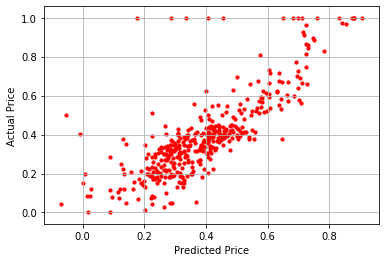

RMSE: 0.12785502011806624
r2_score: 0.637849985054999


In [38]:
# 다항 회귀 모델
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x = df.iloc[:,:-1]  # 9개 컬럼을 피쳐로 사용, (400, 9), 2차원
y = df['MEDV'].values.reshape(-1,1)    #(400, 1), 2차원, DataFrame
y = df.iloc[:,-1:]                     # (400, 1), 2차원, DataFrame

# 클래스의 인스턴스 생성
lr = LinearRegression()

# 학습
lr.fit(x,y)

# 회귀 계수 확인
print(lr.coef_)        # weight이 9개 생성,
print(lr.intercept_)   # bias는 1개
                       # H(x1, x2, ...,x9) = w1*x1 + w2*x2+...+w9*x9 +b

# 예측
y_pred = lr.predict(x)

# 결과 시각화 : x축을 예측값, y축을 실제값
plt.scatter(y_pred,y,c = 'r',s=10)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.grid(True)
plt.show()

# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('RMSE:',rmse)   # RMSE: 0.12785502011806624, 단순히 스케일링으로 인한 감소, 정확도 향상없음

r2 = r2_score(y,y_pred)
print('r2_score:',r2)  # r2_score: 0.637849985054999, 정확도 향상 없음

### 앙상블 모델 사용

In [42]:
df = pd.read_csv('boston_train.csv')
x = df.iloc[:,:-1]     # 9개 컬럼을 피쳐로 사용, (400,9), 2차원
y = df['MEDV'].values  # (400,), 1ckdnjs, ndarray

### RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,random_state=0)

rf.fit(x,y)  # 학습

y_pred = rf.predict(x)  # 예측

# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('RMSE:',rmse)   # RMSE: 1.7317771332867868 , LinearRegression보다 감소,정확도 증가
r2 = r2_score(y,y_pred)
print('r2_score:',r2) # r2_score: 0.9671895707796678, 정확도 증가

RMSE: 1.7317771332867868
r2_score: 0.9671895707796678


### XGBoost : XGBRegressor

In [44]:
# ! pip install xgboost  # 설치하는 거
from xgboost import XGBRegressor

x_train,y_train = x,y
x_test,y_test = x,y

evals = [(x_test,y_test)]

xgb_wrapper = XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=3)

xgb_wrapper.fit(x_train,y_train,early_stopping_rounds=400,eval_set=evals,
               eval_metric='rmse',verbose=True)  # 400번 돌아서 비용이 줄지 않으면 멈춤/ eval로 오차 구함

y_pred = xgb_wrapper.predict(x_test)

[0]	validation_0-rmse:21.84370
Will train until validation_0-rmse hasn't improved in 400 rounds.
[1]	validation_0-rmse:19.81568
[2]	validation_0-rmse:17.99740
[3]	validation_0-rmse:16.36960
[4]	validation_0-rmse:14.89697
[5]	validation_0-rmse:13.57208
[6]	validation_0-rmse:12.39708
[7]	validation_0-rmse:11.35147
[8]	validation_0-rmse:10.40381
[9]	validation_0-rmse:9.55481
[10]	validation_0-rmse:8.79851
[11]	validation_0-rmse:8.12908
[12]	validation_0-rmse:7.54437
[13]	validation_0-rmse:7.01170
[14]	validation_0-rmse:6.54889
[15]	validation_0-rmse:6.14220
[16]	validation_0-rmse:5.77109
[17]	validation_0-rmse:5.43815
[18]	validation_0-rmse:5.15685
[19]	validation_0-rmse:4.86338
[20]	validation_0-rmse:4.63641
[21]	validation_0-rmse:4.36953
[22]	validation_0-rmse:4.19635
[23]	validation_0-rmse:4.01448
[24]	validation_0-rmse:3.87042
[25]	validation_0-rmse:3.72403
[26]	validation_0-rmse:3.62040
[27]	validation_0-rmse:3.50650
[28]	validation_0-rmse:3.40963
[29]	validation_0-rmse:3.33230
[30]	

[258]	validation_0-rmse:1.16760
[259]	validation_0-rmse:1.16290
[260]	validation_0-rmse:1.16119
[261]	validation_0-rmse:1.15859
[262]	validation_0-rmse:1.15478
[263]	validation_0-rmse:1.15062
[264]	validation_0-rmse:1.14454
[265]	validation_0-rmse:1.14081
[266]	validation_0-rmse:1.14005
[267]	validation_0-rmse:1.13595
[268]	validation_0-rmse:1.13284
[269]	validation_0-rmse:1.12990
[270]	validation_0-rmse:1.12921
[271]	validation_0-rmse:1.12786
[272]	validation_0-rmse:1.12583
[273]	validation_0-rmse:1.12165
[274]	validation_0-rmse:1.12083
[275]	validation_0-rmse:1.11906
[276]	validation_0-rmse:1.11684
[277]	validation_0-rmse:1.11230
[278]	validation_0-rmse:1.11116
[279]	validation_0-rmse:1.10995
[280]	validation_0-rmse:1.10846
[281]	validation_0-rmse:1.10586
[282]	validation_0-rmse:1.10527
[283]	validation_0-rmse:1.09754
[284]	validation_0-rmse:1.09559
[285]	validation_0-rmse:1.08817
[286]	validation_0-rmse:1.08333
[287]	validation_0-rmse:1.07858
[288]	validation_0-rmse:1.07323
[289]	va

In [45]:
# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('RMSE:',rmse)   # RMSE: 0.767660835104087 , RandomForest 보다 감소,정확도 증가
r2 = r2_score(y,y_pred)
print('r2_score:',r2) # r2_score: 0.9935528662747737, 정확도 증가

RMSE: 0.767660835104087
r2_score: 0.9935528662747737


### LFBMRegressor

In [47]:
# ! pip install lightgbm
from lightgbm import LGBMRegressor
x_train,y_train = x,y
x_test,y_test = x,y

evals =[(x_test,y_test)]

lgbm_wrapper = LGBMRegressor(n_estimators=400,learning_rate=0.1,max_depth=3)

lgbm_wrapper.fit(x_train,y_train,early_stopping_rounds=400,eval_set=evals,
               eval_metric='rmse', verbose=True)

y_pred = lgbm_wrapper.predict(x_test)

[1]	training's rmse: 8.91129	training's l2: 79.4111
Training until validation scores don't improve for 400 rounds
[2]	training's rmse: 8.34279	training's l2: 69.6022
[3]	training's rmse: 7.85188	training's l2: 61.6519
[4]	training's rmse: 7.42553	training's l2: 55.1385
[5]	training's rmse: 7.03911	training's l2: 49.5491
[6]	training's rmse: 6.71376	training's l2: 45.0745
[7]	training's rmse: 6.4094	training's l2: 41.0804
[8]	training's rmse: 6.15205	training's l2: 37.8477
[9]	training's rmse: 5.93181	training's l2: 35.1864
[10]	training's rmse: 5.73627	training's l2: 32.9047
[11]	training's rmse: 5.5679	training's l2: 31.0016
[12]	training's rmse: 5.42094	training's l2: 29.3866
[13]	training's rmse: 5.28649	training's l2: 27.947
[14]	training's rmse: 5.17572	training's l2: 26.7881
[15]	training's rmse: 5.07559	training's l2: 25.7616
[16]	training's rmse: 4.92721	training's l2: 24.2774
[17]	training's rmse: 4.79752	training's l2: 23.0162
[18]	training's rmse: 4.72913	training's l2: 22.3

[217]	training's rmse: 2.15237	training's l2: 4.6327
[218]	training's rmse: 2.14977	training's l2: 4.62151
[219]	training's rmse: 2.14278	training's l2: 4.59149
[220]	training's rmse: 2.13688	training's l2: 4.56628
[221]	training's rmse: 2.13148	training's l2: 4.54322
[222]	training's rmse: 2.12707	training's l2: 4.52441
[223]	training's rmse: 2.12507	training's l2: 4.51592
[224]	training's rmse: 2.1225	training's l2: 4.50502
[225]	training's rmse: 2.1184	training's l2: 4.48761
[226]	training's rmse: 2.11639	training's l2: 4.47911
[227]	training's rmse: 2.11151	training's l2: 4.45849
[228]	training's rmse: 2.10789	training's l2: 4.44321
[229]	training's rmse: 2.10644	training's l2: 4.43708
[230]	training's rmse: 2.10249	training's l2: 4.42044
[231]	training's rmse: 2.09786	training's l2: 4.40104
[232]	training's rmse: 2.09478	training's l2: 4.38811
[233]	training's rmse: 2.09011	training's l2: 4.36857
[234]	training's rmse: 2.08718	training's l2: 4.35633
[235]	training's rmse: 2.08365	

In [48]:
# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('RMSE:',rmse)   # RMSE: 1.6934916754841574 , XGBoost 보다 증가,정확도 감소
r2 = r2_score(y,y_pred)
print('r2_score:',r2) # r2_score: 0.9686242553066795,XGBoost 보다 정확도가 약간 감소

RMSE: 1.6934916754841574
r2_score: 0.9686242553066795
